In [1]:
!pip install sounddevice

In [2]:
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

# 2. Gradiente Descendiente

Se crea el algoritmo del Gradiente Descendiente, en una función, modificando un poco la del ejemplo del punto 2.

In [3]:
def y_predict(a, b, c, d, x):
    return a * np.sin(b * x + c) + d

def gradient_descent(x, y, lr, batch, epochs):
    n = len(x)
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0
    
    for epoch in epochs:
        for i in range(epoch):
            a_gradiente = 0
            b_gradiente = 0
            c_gradiente = 0
            d_gradiente = 0
            e = 0

            for _ in range(batch):
                ix = int(random.uniform(0, n))
                y_pred = y_predict(a, b, c, d, x[ix])
                error = y[ix] - y_pred

                e += error**2
                a_gradiente += 2 * error * np.sin(b * x[ix] + c)
                b_gradiente += 2 * error * a * np.cos(b * x[ix] + c) * x[ix]
                c_gradiente += 2 * error * a * np.cos(b * x[ix] + c)
                d_gradiente += 2 * error

            a -= lr * a_gradiente / batch
            b -= lr * b_gradiente / batch
            c -= lr * c_gradiente / batch

            e /= batch
            rsl.append([a, b, c, e])
            print(f"Amplitude: {a}, Period: {b}, Constant: {c}, Error: {e}")

    return rsl, a, b, c

Se cargan los datos

In [4]:
data = pd.read_csv('data/senal.csv')

Se asignan los valores de las variables X, Y

In [5]:
x = data['x'].values
y = data['y'].values

Se parametrizan los parametros del algoritmo de gradiente descendente

In [6]:
lr = 0.01
batch = 500
epochs = [1000, 2000]

Se aplica el algoritmo de gradiente descendente

In [7]:
resultados, a, b, c = gradient_descent(x, y, lr, batch, epochs)

Amplitude: 0.6163013392392246, Period: 0.7517490816597046, Constant: 0.9475292118955844, Error: 4.739677411512261
Amplitude: 0.6298441002203414, Period: 0.7483863849351846, Constant: 0.9435032386039999, Error: 4.588040332271349
Amplitude: 0.6471758378071459, Period: 0.7414035902724992, Constant: 0.9375272636725432, Error: 5.047606938928327
Amplitude: 0.6663509142465465, Period: 0.7340936478780727, Constant: 0.9313527129241467, Error: 5.0870431352813705
Amplitude: 0.6834371378917283, Period: 0.7262912531342571, Constant: 0.9249524621337812, Error: 5.082984686648327
Amplitude: 0.7031777480393177, Period: 0.7177299824787732, Constant: 0.9182525628046707, Error: 5.055256982856601
Amplitude: 0.7228347044793543, Period: 0.7094515550729169, Constant: 0.9117260844215481, Error: 4.97357946034616
Amplitude: 0.7412052899091515, Period: 0.7040293229855777, Constant: 0.9064482985671275, Error: 5.104531271798614
Amplitude: 0.759677025355838, Period: 0.6977298230337121, Constant: 0.9009320919773016, 

Amplitude: 3.811524290533297, Period: 0.4108537958821139, Constant: 0.8922421913065662, Error: 19.63930170170733
Amplitude: 3.892403426754996, Period: 0.4000526346478834, Constant: 0.8980624267467542, Error: 21.04681586275762
Amplitude: 3.9722126043806276, Period: 0.40356614284127873, Constant: 0.914194193917462, Error: 20.64178204624355
Amplitude: 4.057593001901251, Period: 0.39662540716172645, Constant: 0.9238329839733106, Error: 22.896322552936645
Amplitude: 4.14159293978225, Period: 0.3862721944605593, Constant: 0.9319335192165569, Error: 22.602464877723502
Amplitude: 4.226336297504373, Period: 0.38333151385969744, Constant: 0.9454150989820198, Error: 22.9986012432922
Amplitude: 4.311136723311234, Period: 0.37350990089263586, Constant: 0.9558340639748407, Error: 22.820074828859365
Amplitude: 4.401000003050326, Period: 0.3639517136732408, Constant: 0.9660437272755897, Error: 25.083628437882044
Amplitude: 4.490936570050075, Period: 0.35290214259108, Constant: 0.9759148725765778, Erro

Amplitude: 13.915460834187849, Period: 2.6638957700636268, Constant: 2.573806003905439, Error: 125.31068108207802
Amplitude: 14.081744019612097, Period: 2.4909417415217, Constant: 2.5232431373464674, Error: 127.14848333511748
Amplitude: 14.253765838103384, Period: 2.886448486464184, Constant: 2.834880215283607, Error: 128.65255484969072
Amplitude: 14.406970093503203, Period: 3.032625842844548, Constant: 2.7872453431632733, Error: 129.62835450118604
Amplitude: 14.568368231868208, Period: 3.4121131083870724, Constant: 2.8213582817216416, Error: 139.34962436650363
Amplitude: 14.73993297461136, Period: 3.39273663462704, Constant: 2.680364451371568, Error: 147.98182317697677
Amplitude: 14.922300248484486, Period: 3.6963673889592954, Constant: 2.680915063376749, Error: 159.62678722967138
Amplitude: 15.104286928763125, Period: 3.026738114817746, Constant: 2.2480405352746, Error: 157.33335686862205
Amplitude: 15.282429930303895, Period: 3.279975619678477, Constant: 2.422727143445563, Error: 15

Amplitude: 34.83717538430466, Period: -5.323833793913829, Constant: -3.1842896217407692, Error: 636.8829367066796
Amplitude: 35.196794914120765, Period: -4.983130478522258, Constant: -3.621846943074526, Error: 654.0694728700049
Amplitude: 35.55251121158026, Period: -2.7089195969710076, Constant: -2.760472644376841, Error: 658.2836783300651
Amplitude: 35.89499660291712, Period: 2.2870362374920923, Constant: 0.06874780760943011, Error: 583.1327998510639
Amplitude: 36.3061976603342, Period: -1.7791919344867768, Constant: -2.624952551904642, Error: 719.713769040109
Amplitude: 36.67876698428392, Period: -2.0691513756607387, Constant: -3.083081842732561, Error: 703.460196418589
Amplitude: 37.11922247601374, Period: -2.3843659439521723, Constant: -2.0921985378886583, Error: 811.7618872592955
Amplitude: 37.55881396910246, Period: -5.008336646525166, Constant: -3.8182070961080603, Error: 836.4127683288125
Amplitude: 37.93277902458035, Period: -2.82406241487684, Constant: -3.0177440794831605, Er

Amplitude: 92.47020323411013, Period: -76.35022269844558, Constant: -41.301908358140075, Error: 4123.421755630622
Amplitude: 93.38808123789245, Period: -83.13781546950268, Constant: -44.70834870198811, Error: 4247.544543425657
Amplitude: 94.31400403269107, Period: -86.42588257052704, Constant: -45.28252810049665, Error: 4327.733318718127
Amplitude: 95.22500765922398, Period: -82.82373095675538, Constant: -43.52728865070055, Error: 4300.961216798408
Amplitude: 96.17063467043504, Period: -75.66003246244944, Constant: -39.91952121309422, Error: 4504.137879131523
Amplitude: 97.10699340019507, Period: -89.00680788461295, Constant: -48.62454428222928, Error: 4508.772151698802
Amplitude: 98.11153169448771, Period: -90.17846336120013, Constant: -49.40372353578313, Error: 4878.775444005647
Amplitude: 99.10331373484514, Period: -93.25408494480604, Constant: -51.878390511645605, Error: 4871.330569291054
Amplitude: 100.0655389513436, Period: -95.49014371469244, Constant: -52.085823159211884, Error

Amplitude: 231.08315584853162, Period: -85.78661727500943, Constant: -97.61730220198606, Error: 26462.083455831413
Amplitude: 233.44058406342765, Period: -135.33863634084926, Constant: -125.11100518474285, Error: 27249.48995634084
Amplitude: 235.75183881495613, Period: -145.1497019450636, Constant: -143.12091508580363, Error: 26976.930510595896
Amplitude: 238.0508540253333, Period: -160.91475517988115, Constant: -147.65194291791417, Error: 27081.47963583566
Amplitude: 240.37149426932652, Period: -130.42610047113646, Constant: -131.9077712532686, Error: 27637.79764100196
Amplitude: 242.79031324734265, Period: -131.4922418060575, Constant: -131.23930557870995, Error: 29039.780228253323
Amplitude: 245.17204921103348, Period: -133.02866418730363, Constant: -133.02243489510528, Error: 28939.123692212692
Amplitude: 247.62282264210737, Period: -163.16208579715865, Constant: -151.46910752326647, Error: 30054.91113899264
Amplitude: 250.30717348589684, Period: -177.5731384574587, Constant: -172.

Amplitude: 651.0682942520338, Period: 663.6022974216279, Constant: 171.06205363528022, Error: 204025.68859507746
Amplitude: 657.6248048255387, Period: 646.4890457661214, Constant: 99.40088385524025, Error: 213437.94358475535
Amplitude: 664.4533923818248, Period: 728.0058281700146, Constant: 187.7281176596794, Error: 224510.3898959474
Amplitude: 670.9014945249869, Period: 732.5615344860495, Constant: 146.9620884978585, Error: 214192.04718112413
Amplitude: 677.5337713588746, Period: 991.5653349124759, Constant: 389.5405093535964, Error: 222456.9697411393
Amplitude: 684.3795553782845, Period: 974.280460891488, Constant: 435.65243699115535, Error: 231891.57856578796
Amplitude: 691.2959023883616, Period: 914.0152071195985, Constant: 479.28766898097444, Error: 236641.42855019792
Amplitude: 697.9296225584638, Period: 713.5290152702369, Constant: 453.02538293214275, Error: 229240.56061899982
Amplitude: 704.9407159258474, Period: 361.285016404921, Constant: 195.3581142672519, Error: 244655.3675

Amplitude: 1638.239152575111, Period: 8615.269041837631, Constant: 4268.193825853279, Error: 1323984.9964499003
Amplitude: 1654.7023901032642, Period: 8187.65021934268, Constant: 3946.99579295503, Error: 1348459.731323407
Amplitude: 1671.5700934743684, Period: 9689.339935601422, Constant: 4610.832964824468, Error: 1395701.9905252883
Amplitude: 1688.9450290919872, Period: 9677.864959317107, Constant: 4839.42065631148, Error: 1452280.3463012015
Amplitude: 1705.972763738548, Period: 10038.75095853371, Constant: 5126.45493313608, Error: 1437975.2096146655
Amplitude: 1722.754460679101, Period: 10334.584004526207, Constant: 5235.76234234707, Error: 1431317.3332614219
Amplitude: 1739.5895084001575, Period: 13100.996037820125, Constant: 7347.801420074206, Error: 1450157.6191478316
Amplitude: 1757.9495011965275, Period: 12891.889592108244, Constant: 7219.210740952098, Error: 1597088.7789222081
Amplitude: 1775.8082021063042, Period: 11796.003692961694, Constant: 7175.903287179724, Error: 1569850

Amplitude: 4304.452241623503, Period: 85032.20485601181, Constant: 55500.80891214443, Error: 8807153.064032521
Amplitude: 4346.98667189746, Period: 87583.66392032108, Constant: 58483.68088976483, Error: 9154219.880746778
Amplitude: 4389.957638152742, Period: 72138.09666553178, Constant: 51578.25558058231, Error: 9340084.999687636
Amplitude: 4432.5134708030555, Period: 62513.81969566154, Constant: 51740.428443537785, Error: 9341128.184207385
Amplitude: 4478.49368992419, Period: 61282.51545954734, Constant: 52435.21767280539, Error: 10190351.283536682
Amplitude: 4525.6955934880725, Period: 64486.21620857538, Constant: 54384.86824703034, Error: 10569516.466609834
Amplitude: 4572.30307914284, Period: 75008.2181058554, Constant: 63209.723108729544, Error: 10546480.976223595
Amplitude: 4617.034538398057, Period: 72701.84906145988, Constant: 65376.65672445236, Error: 10226460.17029328
Amplitude: 4663.949762547195, Period: 69927.31783184108, Constant: 64909.79088443239, Error: 10830312.7951678

Amplitude: 11251.03776370568, Period: 9999.829374105218, Constant: -8704.601123409262, Error: 60220282.836157076
Amplitude: 11362.905205954963, Period: -27834.982058531794, Constant: -36464.32365811207, Error: 62931424.20825714
Amplitude: 11473.475603508115, Period: 32030.921104665576, Constant: 4595.087052904804, Error: 62820106.243211605
Amplitude: 11588.458111496275, Period: -58063.74964812073, Constant: -31119.89290054208, Error: 65962125.46681769
Amplitude: 11706.855864139532, Period: -126751.6119607003, Constant: -70900.64783948119, Error: 68602099.4595622
Amplitude: 11824.498098828131, Period: -164936.9858936177, Constant: -92391.88036359809, Error: 68860050.52966337
Amplitude: 11943.378344812367, Period: -130789.29815045671, Constant: -57037.561773402864, Error: 70284773.72785228
Amplitude: 12062.234095916188, Period: -68147.42027415436, Constant: -47610.50023700047, Error: 70977748.55581775
Amplitude: 12181.00106475723, Period: -163028.58648728905, Constant: -95025.4958820668,

Amplitude: 29018.79930952022, Period: -2077857.3199404352, Constant: -1557100.3526173462, Error: 410149234.2203368
Amplitude: 29308.557368457463, Period: -1889990.280215103, Constant: -1349942.449790139, Error: 420419885.40659344
Amplitude: 29606.879056950795, Period: -1312428.8349276935, Constant: -905821.8973740209, Error: 437169033.5622153
Amplitude: 29904.860485570774, Period: -1138799.0114710585, Constant: -742481.4604308337, Error: 441114834.02156174
Amplitude: 30222.21924395381, Period: -962035.156667707, Constant: -532974.8241679512, Error: 474528744.5542938
Amplitude: 30522.754815034106, Period: -728460.2503120829, Constant: -434097.2780329301, Error: 454141374.8944817
Amplitude: 30816.88642192239, Period: -408431.2132842696, Constant: -376494.6808242376, Error: 448884460.54782015
Amplitude: 31139.541156440857, Period: -336605.0457979082, Constant: -337275.1639144015, Error: 497166902.75577784
Amplitude: 31458.03737183405, Period: 262473.7392128558, Constant: -31072.7508417015

Amplitude: 81544.7236556457, Period: -22269395.02747761, Constant: -19754549.047388438, Error: 3406279124.3596663
Amplitude: 82374.50209725923, Period: -21667111.860203646, Constant: -19734557.88991778, Error: 3383195680.9794974
Amplitude: 83216.71437264452, Period: -21583934.071657997, Constant: -20264915.50384015, Error: 3468837529.423628
Amplitude: 84019.47891215421, Period: -19821185.84169385, Constant: -18189011.720144145, Error: 3340167683.896993
Amplitude: 84830.95704410365, Period: -18984318.012047965, Constant: -16766062.804385092, Error: 3408993155.521288
Amplitude: 85700.65159691327, Period: -16948168.40560188, Constant: -16223661.770276284, Error: 3688853588.471969
Amplitude: 86564.25251051129, Period: -22202239.33451841, Constant: -18747248.013238925, Error: 3700561972.145218
Amplitude: 87391.96695114631, Period: -18871283.29387652, Constant: -17391347.728451267, Error: 3582522377.6230345
Amplitude: 88199.23959801496, Period: -20287976.887249816, Constant: -18675684.178110

Amplitude: 204305.4622567434, Period: -61719127.358954355, Constant: -37374591.10858154, Error: 21105612810.95145
Amplitude: 206398.34060872582, Period: -56856271.77436526, Constant: -41721754.07684776, Error: 21379321432.629566
Amplitude: 208511.07858072018, Period: -87600315.76210344, Constant: -62583600.741378516, Error: 21803292059.495903
Amplitude: 210460.5147011208, Period: -80328022.81954962, Constant: -60347686.86716185, Error: 20323954669.437405
Amplitude: 212581.12332905832, Period: -88537703.27064341, Constant: -67102997.43447658, Error: 22315217718.734283
Amplitude: 214719.01660646382, Period: -104795958.57702324, Constant: -78875719.30446738, Error: 22723828017.814896
Amplitude: 216796.81597089753, Period: -112812682.58634609, Constant: -82249801.67855845, Error: 22307176141.65355
Amplitude: 218928.38641064582, Period: -88391689.53611496, Constant: -72424901.63878256, Error: 23105894177.74884
Amplitude: 221089.25201655345, Period: -101977973.96303204, Constant: -80960482.4

Amplitude: 474755.8189216192, Period: 17719523.98440539, Constant: -22202276.668301, Error: 103983846229.09314
Amplitude: 479617.0851232098, Period: -216175155.7469105, Constant: -163284088.844459, Error: 115395699652.02942
Amplitude: 484234.67553768965, Period: -180312913.68719822, Constant: -119734388.51858135, Error: 110733807502.55911
Amplitude: 488627.66278622404, Period: -88326096.96927947, Constant: -64757930.15959447, Error: 106361836561.54543
Amplitude: 493452.53976415243, Period: -170378745.78926235, Constant: -156939023.0976677, Error: 117878406207.96614
Amplitude: 498452.80969864066, Period: -229509430.56577915, Constant: -186797016.31107587, Error: 123369773849.08261
Amplitude: 503579.2626343023, Period: -367807705.24818313, Constant: -238580533.97054857, Error: 127764749880.14589
Amplitude: 508514.5098175453, Period: -114034374.29292646, Constant: -109157447.62943843, Error: 124264396938.44536
Amplitude: 513471.2276982021, Period: -155820929.14894646, Constant: -124247048

Amplitude: 1193180.167020933, Period: -3066938755.069895, Constant: -518047103.53620374, Error: 693873636993.4739
Amplitude: 1205121.7736721905, Period: -3289202243.4187713, Constant: -525296005.7989796, Error: 712424507024.1239
Amplitude: 1216780.0005881384, Period: -3415421366.3833213, Constant: -522972512.84261984, Error: 702479118720.7244
Amplitude: 1229129.7372247188, Period: -3365080250.4178896, Constant: -521521891.8577915, Error: 751345552525.0013
Amplitude: 1241329.294881626, Period: -4315707668.996954, Constant: -1253688994.7367587, Error: 749741941386.8888
Amplitude: 1254348.92611633, Period: -3816092957.337931, Constant: -1162129914.5661268, Error: 808082579938.1195
Amplitude: 1267629.9756233264, Period: -6023285050.774717, Constant: -2236688743.41854, Error: 832953501738.8826
Amplitude: 1280028.9526525992, Period: -5926254354.217317, Constant: -1959247462.3394394, Error: 785865916903.0299
Amplitude: 1292613.8549023573, Period: -6175043522.782426, Constant: -2317275648.1720

Amplitude: 3160752.004050744, Period: 9539386181.400187, Constant: 6173701768.610989, Error: 4901102750117.459
Amplitude: 3191014.1780903633, Period: 11923176956.030657, Constant: 6748404349.7511635, Error: 4782561644173.58
Amplitude: 3224046.932553191, Period: 4942204101.635586, Constant: 2641521985.3763466, Error: 5270398919209.546
Amplitude: 3257148.5768268993, Period: 4717158107.420502, Constant: 2433230798.399557, Error: 5336062751849.066
Amplitude: 3288914.855555431, Period: -13441179108.174809, Constant: -9255092693.380283, Error: 5173374330602.492
Amplitude: 3322709.4410453383, Period: -13182776503.241873, Constant: -7363080652.263224, Error: 5557375619986.355
Amplitude: 3356302.3324561287, Period: -12008211529.42049, Constant: -7588899102.466222, Error: 5580970997846.426
Amplitude: 3391733.8533545905, Period: -2742764204.743984, Constant: -2226604614.9325266, Error: 5945944608520.593
Amplitude: 3424301.6438749433, Period: 2487372865.260663, Constant: 1892555018.7899446, Error:

Amplitude: 8697830.808007345, Period: 39498134375.02692, Constant: 15624547388.973526, Error: 36869878947483.01
Amplitude: 8787208.219039168, Period: 116444049684.79678, Constant: 53530547090.01521, Error: 38869480624334.625
Amplitude: 8877525.481779205, Period: 112379816439.06453, Constant: 52179840395.16105, Error: 39681830222377.27
Amplitude: 8963991.290162154, Period: 156502860802.65936, Constant: 66153829769.11343, Error: 38380122007024.266
Amplitude: 9052346.444220949, Period: 177114086357.29797, Constant: 79822043588.6694, Error: 39600742353600.42
Amplitude: 9142157.066600228, Period: 206156563715.6548, Constant: 107830196878.18167, Error: 40649843428861.67
Amplitude: 9231896.908469735, Period: 156577212959.2182, Constant: 67362378550.244385, Error: 41020786286881.51
Amplitude: 9321727.817203505, Period: 134172778591.73712, Constant: 40909135394.39542, Error: 41465484493386.93
Amplitude: 9412035.352201954, Period: 82735414831.7918, Constant: 10323055148.294884, Error: 4209111212

Amplitude: 23757544.531494137, Period: -246983986401.665, Constant: -292917330240.4769, Error: 280026015565191.1
Amplitude: 23988768.08728689, Period: -95618464253.05954, Constant: -198828320066.63757, Error: 274665196661578.25
Amplitude: 24245130.890138473, Period: 283047285576.2816, Constant: -16697942555.42865, Error: 307491391683485.94
Amplitude: 24494838.463496394, Period: 411190255753.8325, Constant: 113588564536.2041, Error: 302709639083667.9
Amplitude: 24730854.73207305, Period: 71285401448.40271, Constant: -25915703570.873962, Error: 289059018263120.5
Amplitude: 24973544.9579202, Period: 168407454904.61847, Constant: -96860705910.62355, Error: 300096837682857.4
Amplitude: 25214735.66800851, Period: 86708441293.758, Constant: -114711485549.5985, Error: 301169350262136.56
Amplitude: 25469874.451721877, Period: 403486553899.0139, Constant: 6816471828.988495, Error: 321662848343072.2
Amplitude: 25710342.587817635, Period: 642795451306.9485, Constant: 65102578304.096275, Error: 306

Amplitude: 58564350.030089915, Period: 2865603964628.0186, Constant: 2264628088771.1123, Error: 1627826617808110.2
Amplitude: 59138581.37610119, Period: 2448336739164.5317, Constant: 1465952769605.1975, Error: 1681474276061012.5
Amplitude: 59709130.94312039, Period: 2469239782137.8574, Constant: 1527531427009.6836, Error: 1687074597641872.2
Amplitude: 60323430.465226516, Period: 3671943295350.5034, Constant: 2283944544232.5225, Error: 1833964533705565.2
Amplitude: 60927659.14265667, Period: 1647035793412.553, Constant: 1125913200493.237, Error: 1822457333428625.2
Amplitude: 61535531.402159706, Period: 701582840071.716, Constant: -190546281235.4275, Error: 1851811696764145.5
Amplitude: 62188198.49835033, Period: 3747334775533.2637, Constant: 1305474451502.4653, Error: 2008110824444456.5
Amplitude: 62817699.96099067, Period: 107670158699.67822, Constant: -435282736400.146, Error: 1957378097457433.5
Amplitude: 63449141.65075053, Period: -600882269109.502, Constant: -513161821696.3313, Err

Amplitude: 151794558.69932914, Period: 8460392330664.668, Constant: 4579375396055.621, Error: 1.1188656915355684e+16
Amplitude: 153318859.51086587, Period: 7488301841953.901, Constant: 3468784609818.1895, Error: 1.156902846890847e+16
Amplitude: 154808534.7500354, Period: 16980833446269.688, Constant: 9558294909948.516, Error: 1.141976544354405e+16
Amplitude: 156367433.07901162, Period: -5982762617759.551, Constant: -1863980997356.8438, Error: 1.2066538301928392e+16
Amplitude: 157906399.54282337, Period: -15687373358830.967, Constant: -2593813401893.414, Error: 1.2032211781716284e+16
Amplitude: 159400194.51272476, Period: -30233908297784.086, Constant: -7847221056404.626, Error: 1.179398927023304e+16
Amplitude: 160973838.34559655, Period: -31784580293754.08, Constant: -11449663227286.355, Error: 1.2541956658459232e+16
Amplitude: 162629794.06014478, Period: -32694111099022.445, Constant: -13832469242096.266, Error: 1.3328277372317782e+16
Amplitude: 164212846.6771142, Period: -97836034754

Amplitude: 379280584.8556442, Period: -456217779688731.0, Constant: -325923148720530.75, Error: 7.22154550240755e+16
Amplitude: 383167544.74001706, Period: -300865571472553.4, Constant: -244033460358665.3, Error: 7.37124208974416e+16
Amplitude: 386915259.05271494, Period: -403062984664387.94, Constant: -293955214064870.8, Error: 7.180012454672324e+16
Amplitude: 390792629.0759892, Period: -404974107758023.94, Constant: -294857019792781.8, Error: 7.5010681369761e+16
Amplitude: 394694615.84640414, Period: -535190984891202.94, Constant: -357149163330448.56, Error: 7.624338340151174e+16
Amplitude: 398526694.13347995, Period: -532648280193524.3, Constant: -371325648231318.2, Error: 7.562503336540586e+16
Amplitude: 402386087.22331274, Period: -442667487494043.6, Constant: -323691191906461.94, Error: 7.690355853269488e+16
Amplitude: 406508200.91203535, Period: -403937973195360.2, Constant: -326478832552245.9, Error: 8.293405984398971e+16
Amplitude: 410365260.4798362, Period: -575043766798311.1

Amplitude: 971659119.3984364, Period: -662964279655301.8, Constant: -1671829629127955.5, Error: 4.6412145241357274e+17
Amplitude: 980990601.6830978, Period: -812792074576213.4, Constant: -1980147252986883.5, Error: 4.533509929937898e+17
Amplitude: 991058245.7871121, Period: -1781398657105235.5, Constant: -2526594144648702.0, Error: 4.9381321222841626e+17
Amplitude: 1001225017.9676489, Period: -1005295217950963.1, Constant: -2228335496231514.8, Error: 5.037931701204923e+17
Amplitude: 1010706911.3809849, Period: -393926018756582.75, Constant: -1943445530915283.0, Error: 4.74675445230194e+17
Amplitude: 1020727603.1607758, Period: -86858683961915.44, Constant: -1693834663342199.8, Error: 5.063991218722867e+17
Amplitude: 1030638009.2280357, Period: 186865963149306.34, Constant: -1587909879531751.5, Error: 5.057912514228307e+17
Amplitude: 1040689456.2169027, Period: -428153604329997.25, Constant: -1917295856204080.5, Error: 5.179701657125232e+17
Amplitude: 1050617711.1460696, Period: -121684

Amplitude: 2497772327.46818, Period: -1.1165736307737152e+16, Constant: -1.221020966443261e+16, Error: 3.1389242337155743e+18
Amplitude: 2522148945.6214256, Period: -1.6654884935380204e+16, Constant: -1.5247917440511554e+16, Error: 3.0443621128137436e+18
Amplitude: 2548846640.3761086, Period: -1.0577531111516102e+16, Constant: -1.1608639426323486e+16, Error: 3.3667781338052977e+18
Amplitude: 2574048681.9259653, Period: -1.757164041657139e+16, Constant: -1.5380177731086878e+16, Error: 3.211806946486273e+18
Amplitude: 2600099528.299785, Period: -1.2285243222059588e+16, Constant: -1.2114246855139938e+16, Error: 3.352807338304497e+18
Amplitude: 2625207968.653401, Period: -9162028842408598.0, Constant: -1.0365180012589538e+16, Error: 3.264222195873774e+18
Amplitude: 2652389218.2406874, Period: -7063673305410312.0, Constant: -1.0031737715655144e+16, Error: 3.5678216502726943e+18
Amplitude: 2678398394.7164187, Period: -7639996082621809.0, Constant: -8982277069400680.0, Error: 3.44932296304474

Amplitude: 6423218765.104698, Period: -1.6826029780345782e+17, Constant: -6.049805638438535e+16, Error: 1.9645607846241464e+19
Amplitude: 6485103125.302472, Period: -1.468120198052293e+17, Constant: -4.376911071392234e+16, Error: 1.9874839184664383e+19
Amplitude: 6550103617.082248, Period: -1.2346587925281226e+17, Constant: -3.0171136912444576e+16, Error: 2.107674461900257e+19
Amplitude: 6615333294.250756, Period: -1.1841677043597938e+17, Constant: -1.9322098062578148e+16, Error: 2.1363057217548345e+19
Amplitude: 6684715483.146908, Period: -1.349968475563468e+17, Constant: -3.260119715580164e+16, Error: 2.294931521168937e+19
Amplitude: 6754471700.056071, Period: -1.2289230919377499e+17, Constant: -2.608464693151293e+16, Error: 2.3315023160326844e+19
Amplitude: 6818173804.207455, Period: -1.12782182269543e+17, Constant: -1.448448911466673e+16, Error: 2.1513702985521762e+19
Amplitude: 6883529930.822897, Period: -1.4035123794505814e+17, Constant: -2.724910755050273e+16, Error: 2.228047152

Amplitude: 21424130333.252113, Period: 1.929344835261764e+18, Constant: 1.090899151840485e+18, Error: 2.23371411412602e+20
Amplitude: 21638465438.124756, Period: 1.7250609687547845e+18, Constant: 1.04093906415433e+18, Error: 2.29597161089291e+20
Amplitude: 21852046196.056927, Period: 1.5718261298262728e+18, Constant: 9.240601320578671e+17, Error: 2.310779924369334e+20
Amplitude: 22072001108.287624, Period: 1.7132882087671045e+18, Constant: 1.0127119856881674e+18, Error: 2.403232451550462e+20
Amplitude: 22289465381.407158, Period: 1.9658831631951094e+18, Constant: 1.2019894391016586e+18, Error: 2.3999358386457713e+20
Amplitude: 22521462643.34068, Period: 1.55822003912594e+18, Constant: 9.104755758159831e+17, Error: 2.585547469228517e+20
Amplitude: 22743116083.263115, Period: 1.213303711953639e+18, Constant: 7.551992499164403e+17, Error: 2.495979833477158e+20
Amplitude: 22966693703.10829, Period: 1.278060415261187e+18, Constant: 8.011544530376957e+17, Error: 2.542425880872352e+20
Amplitu

Amplitude: 52549980109.85722, Period: 3.8586899573226025e+18, Constant: -1.0348186112171037e+18, Error: 1.355104456445793e+21
Amplitude: 53056244361.124, Period: 3.618795479146277e+18, Constant: -1.0850709131423707e+18, Error: 1.3302088167188283e+21
Amplitude: 53576639163.50859, Period: 4.047510702987521e+18, Constant: -9.017573973341592e+17, Error: 1.380509689982944e+21
Amplitude: 54119392269.98091, Period: 2.655550056643111e+18, Constant: -1.6321290803871762e+18, Error: 1.4539443670101388e+21
Amplitude: 54670836752.42496, Period: 1.35435739046757e+18, Constant: -2.2058588722177088e+18, Error: 1.492192013027778e+21
Amplitude: 55200810761.41744, Period: 5.261709327272371e+16, Constant: -3.362583824307957e+18, Error: 1.448706126431558e+21
Amplitude: 55751802653.33849, Period: 3.3559502712668037e+18, Constant: -1.6032680859422843e+18, Error: 1.520759957850268e+21
Amplitude: 56277341905.435234, Period: 2.756658676381648e+18, Constant: -2.0563977398118436e+18, Error: 1.4649880334642014e+21

Amplitude: 114315443777.04247, Period: -1.0022510277962228e+19, Constant: 5.89903659221547e+18, Error: 6.912410956997225e+21
Amplitude: 115500526294.35297, Period: -9.161379701202418e+18, Constant: 7.053706770547782e+18, Error: 6.773661693934953e+21
Amplitude: 116677108558.11615, Period: 2.387275602276305e+18, Constant: 1.2073504702869946e+19, Error: 6.794793534677709e+21
Amplitude: 117888222873.86444, Period: -2.0255961015285023e+18, Constant: 1.0469913539536306e+19, Error: 7.065465824729891e+21
Amplitude: 119131236903.087, Period: -1.6855788892959076e+18, Constant: 7.488932842136675e+18, Error: 7.326835745620891e+21
Amplitude: 120285579621.07085, Period: 3.0688922098063237e+18, Constant: 9.228516128233398e+18, Error: 6.875913790163673e+21
Amplitude: 121466845060.68156, Period: 1.4788235206073768e+19, Constant: 1.7086319390818212e+19, Error: 7.104459904501256e+21
Amplitude: 122660467064.85689, Period: 4.1090544189922734e+18, Constant: 1.1996028657772863e+19, Error: 7.249274952107047e+

Amplitude: 282065227461.26697, Period: -3.596834749985681e+20, Constant: -1.3768665193081242e+20, Error: 3.930851484331042e+22
Amplitude: 284878949228.6114, Period: -3.298222073419668e+20, Constant: -1.2301879042961785e+20, Error: 3.96826535159505e+22
Amplitude: 287816582206.8291, Period: -3.700551240055387e+20, Constant: -1.52661285306755e+20, Error: 4.1843489802685975e+22
Amplitude: 290833694642.29865, Period: -3.872136965592152e+20, Constant: -1.709194846518878e+20, Error: 4.341874946550254e+22
Amplitude: 293721189267.3291, Period: -4.0905730952057035e+20, Constant: -1.758409738316844e+20, Error: 4.198903650288122e+22
Amplitude: 296682954502.2068, Period: -4.230328692212748e+20, Constant: -1.8183941737133487e+20, Error: 4.349666035595415e+22
Amplitude: 299586939244.4358, Period: -4.265551081172223e+20, Constant: -1.8381032943365282e+20, Error: 4.307813865766414e+22
Amplitude: 302542784328.2728, Period: -3.993380509485822e+20, Constant: -1.625353982239346e+20, Error: 4.42766290773654

Amplitude: 668113291045.8346, Period: 1.243386606074838e+20, Constant: 2.7921845331783287e+20, Error: 2.2434972905547583e+23
Amplitude: 674756583411.9698, Period: 3.354736117891029e+20, Constant: 4.3116853659465115e+20, Error: 2.2192359630586315e+23
Amplitude: 681780139200.652, Period: 3.099053641558445e+20, Constant: 3.687440991262532e+20, Error: 2.3695952536872126e+23
Amplitude: 688701141939.1598, Period: 1.7664097898209562e+20, Constant: 2.792585656976274e+20, Error: 2.359301105234392e+23
Amplitude: 695624867796.1465, Period: 6.166701288861904e+20, Constant: 4.378329122837668e+20, Error: 2.3841889520906327e+23
Amplitude: 702813184854.5656, Period: 1.0433062953166872e+21, Constant: 6.707698102504205e+20, Error: 2.500186051719918e+23
Amplitude: 709782517823.2292, Period: 9.345492431363087e+20, Constant: 5.5857122608038314e+20, Error: 2.449069550009856e+23
Amplitude: 716929694216.3485, Period: 9.383138621240242e+20, Constant: 5.732756308735827e+20, Error: 2.5364704278178608e+23
Amplitu

Amplitude: 1647068926795.9404, Period: 7.406196837370093e+21, Constant: 6.971512258910912e+21, Error: 1.4235394821559246e+24
Amplitude: 1662495152256.5308, Period: 5.854329236446893e+21, Constant: 6.009737382476921e+21, Error: 1.270402830694466e+24
Amplitude: 1679129710448.5051, Period: 5.951645269088977e+21, Constant: 5.279223917571193e+21, Error: 1.3827436177042835e+24
Amplitude: 1696731739353.5002, Period: 8.279449151464025e+21, Constant: 7.054641004241352e+21, Error: 1.4778044849274676e+24
Amplitude: 1713607906135.5789, Period: 7.094147882574542e+21, Constant: 6.54681943633429e+21, Error: 1.4317163908888394e+24
Amplitude: 1730949884868.803, Period: 6.578600040985679e+21, Constant: 6.752204499111234e+21, Error: 1.4858675932645813e+24
Amplitude: 1748244305263.672, Period: 7.748618239690479e+21, Constant: 7.379364439882582e+21, Error: 1.496788749568502e+24
Amplitude: 1765856353850.6863, Period: 9.666942692683208e+21, Constant: 8.036443670565366e+21, Error: 1.5395081823137566e+24
Ampli

Amplitude: 4023401647956.569, Period: 5.711941530619386e+22, Constant: 2.481634816656436e+22, Error: 7.677785987844342e+24
Amplitude: 4064067479835.237, Period: 4.901413867916478e+22, Constant: 2.0782118378243598e+22, Error: 8.18074874980817e+24
Amplitude: 4105081709721.4424, Period: 4.614624874244474e+22, Constant: 2.154261322695468e+22, Error: 8.33422989455044e+24
Amplitude: 4144988136282.972, Period: 6.621415845439941e+22, Constant: 3.3920173077285124e+22, Error: 8.19095708890359e+24
Amplitude: 4186041395572.5366, Period: 5.667910249391468e+22, Constant: 2.8643402959513476e+22, Error: 8.508263635549872e+24
Amplitude: 4228410105385.2, Period: 6.375415429547468e+22, Constant: 3.1314953389474463e+22, Error: 8.867858657640669e+24
Amplitude: 4270833233241.548, Period: 4.83509803952673e+22, Constant: 2.0665095883813028e+22, Error: 8.969119126491552e+24
Amplitude: 4313972192304.515, Period: 4.500206690412432e+22, Constant: 1.8930128238881597e+22, Error: 9.211965000678131e+24
Amplitude: 435

Amplitude: 14243258591855.293, Period: -6.340337328763578e+23, Constant: -4.363473214420353e+23, Error: 1.0543734723748137e+26
Amplitude: 14382503529320.066, Period: -5.657196345574538e+23, Constant: -3.7882629872790535e+23, Error: 9.916508259587556e+25
Amplitude: 14535161341570.086, Period: -4.780573627331303e+23, Constant: -3.140455833355682e+23, Error: 1.0978007617321063e+26
Amplitude: 14679280081113.553, Period: -1.8038052362754025e+23, Constant: -1.5526956917759488e+23, Error: 1.0473945658039995e+26
Amplitude: 14825388546307.41, Period: -2.5388566206397736e+23, Constant: -1.944060159611228e+23, Error: 1.0723835414011296e+26
Amplitude: 14967524893250.271, Period: -2.888187832080127e+23, Constant: -2.5368641439662827e+23, Error: 1.0536132849903245e+26
Amplitude: 15117859100221.04, Period: -7.376621665023227e+22, Constant: -1.2744996154664636e+23, Error: 1.1250654925709946e+26
Amplitude: 15274963177219.69, Period: -1.73784332064067e+23, Constant: -1.607753121869723e+23, Error: 1.1875

Se crea la tabla con los datos del dataset y la función de predicción aprendida

In [8]:
tabla_resultados = pd.DataFrame(resultados, columns=['Amplitude', 'Period', 'Constant', 'Error'])
print(tabla_resultados)

         Amplitude        Period      Constant         Error
0     6.163013e-01  7.517491e-01  9.475292e-01  4.739677e+00
1     6.298441e-01  7.483864e-01  9.435032e-01  4.588040e+00
2     6.471758e-01  7.414036e-01  9.375273e-01  5.047607e+00
3     6.663509e-01  7.340936e-01  9.313527e-01  5.087043e+00
4     6.834371e-01  7.262913e-01  9.249525e-01  5.082985e+00
...            ...           ...           ...           ...
2995  2.163341e+13 -1.860401e+24 -6.935247e+23  2.260684e+26
2996  2.185807e+13 -1.725656e+24 -5.785522e+23  2.430099e+26
2997  2.208474e+13 -1.421334e+24 -3.846926e+23  2.477301e+26
2998  2.230025e+13 -1.647534e+24 -5.642628e+23  2.379659e+26
2999  2.251823e+13 -1.446723e+24 -4.469500e+23  2.430585e+26

[3000 rows x 4 columns]


Se genera la señal por un periodo más largo de tiempo

In [9]:
x_min = np.min(x)
long_s = [y_predict(a, b, c, 0, xi) for xi in np.arange(x_min, 20 * math.pi, 0.001).astype(np.float32)]

Se dibuja la señal

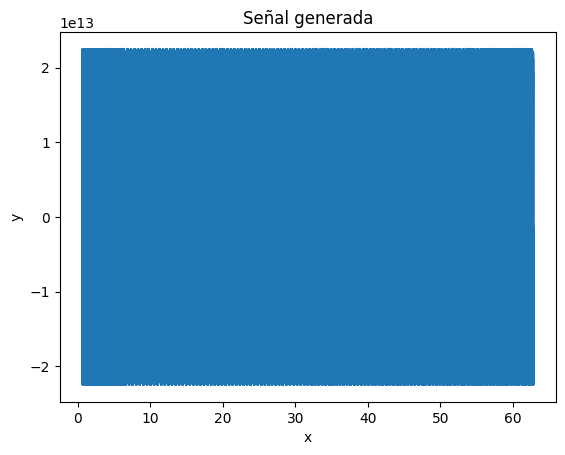

In [10]:
plt.plot(np.arange(x_min, 20 * math.pi, 0.001), long_s)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal generada')
plt.show()

Se reproduce la señal

In [11]:
sd.play(long_s)